<a href="https://colab.research.google.com/github/waqarahmed6095/globalaihubbootcamp/blob/main/MedicalCostAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import mutual_info_regression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder
from sklearn.model_selection import cross_val_score,cross_validate

In [ ]:
data = pd.read_csv("insurance.csv")


In [ ]:
data.charges.min(), data.charges.max()

(1121.8739, 63770.42801)

In [ ]:
data = pd.get_dummies(data, columns = ['children','region'])

In [ ]:
data.head(10)

,age,sex,bmi,smoker,charges,children_0,children_1,children_2,children_3,children_4,children_5,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,yes,16884.92400,1,0,0,0,0,0,0,0,0,1
1,18,male,33.770,no,1725.55230,0,1,0,0,0,0,0,0,1,0
2,28,male,33.000,no,4449.46200,0,0,0,1,0,0,0,0,1,0
3,33,male,22.705,no,21984.47061,1,0,0,0,0,0,0,1,0,0
4,32,male,28.880,no,3866.85520,1,0,0,0,0,0,0,1,0,0
5,31,female,25.740,no,3756.62160,1,0,0,0,0,0,0,0,1,0
6,46,female,33.440,no,8240.58960,0,1,0,0,0,0,0,0,1,0
7,37,female,27.740,no,7281.50560,0,0,0,1,0,0,0,1,0,0
8,37,male,29.830,no,6406.41070,0,0,1,0,0,0,1,0,0,0
9,60,female,25.840,no,28923.13692,1,0,0,0,0,0,0,1,0,0


In [ ]:
labelencoder = LabelEncoder()

In [ ]:
sex = labelencoder.fit_transform(data['sex'])
smoker = labelencoder.fit_transform(data['smoker'])

In [ ]:
data['sex'] = sex
data['smoker']=smoker

In [ ]:
bmi = data['bmi']
scaler= MinMaxScaler().fit(bmi.values.reshape(-1, 1))
bmi = scaler.transform(bmi.values.reshape(-1, 1))

In [ ]:
features = data.drop('charges',axis =1)
label = data['charges']

(array([ 30., 127., 234., 319., 288., 195.,  96.,  32.,  14.,   3.]),
 array([15.96 , 19.677, 23.394, 27.111, 30.828, 34.545, 38.262, 41.979,
        45.696, 49.413, 53.13 ]),
 <a list of 10 Patch objects>)

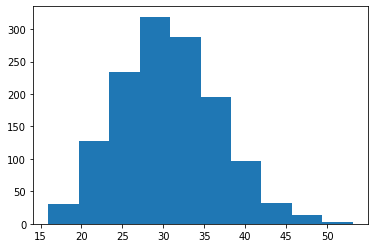

In [ ]:
plt.hist(data['bmi'])

In [ ]:
#data['smoker'].corr(data['region'])

In [ ]:
#plt.scatter(data['charges'],data['smoker'])

In [ ]:
#data['charges'].corr(data['smoker'])

In [ ]:
#plt.scatter(data['bmi'],data['sex'])

In [ ]:
#data['sex'].corr(data['bmi'])

In [ ]:
#data.age.min()

In [ ]:
#plt.scatter(data['bmi'],data['age'])

In [ ]:
#data['bmi'].corr(data['age'])

In [ ]:
bmi =data['bmi']
bmi = sorted(bmi)
q1,q3 = np.percentile(bmi,[25,75])
IQR = q3-q1
IQR
lower_bound = q1 -(1.5 * IQR) 
upper_bound = q3 +(1.5 * IQR)
print(lower_bound,upper_bound)
print(sum(bmi>upper_bound))
print(sum(bmi<lower_bound))

13.7 47.290000000000006
9
0


In [ ]:
data = data[data['bmi']<upper_bound]

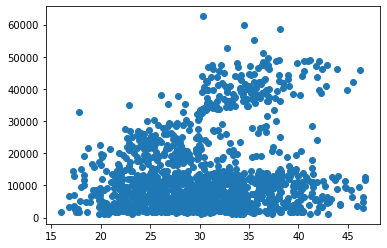

In [ ]:
plt.scatter(data['bmi'],data['charges'])

In [ ]:
data['bmi'].corr(data['charges'])

0.19319613016496298

In [ ]:
#sns.barplot(data=data,x='smoker',y= 'bmi', hue='region')

In [ ]:
#data[['region','smoker','bmi']].corr()

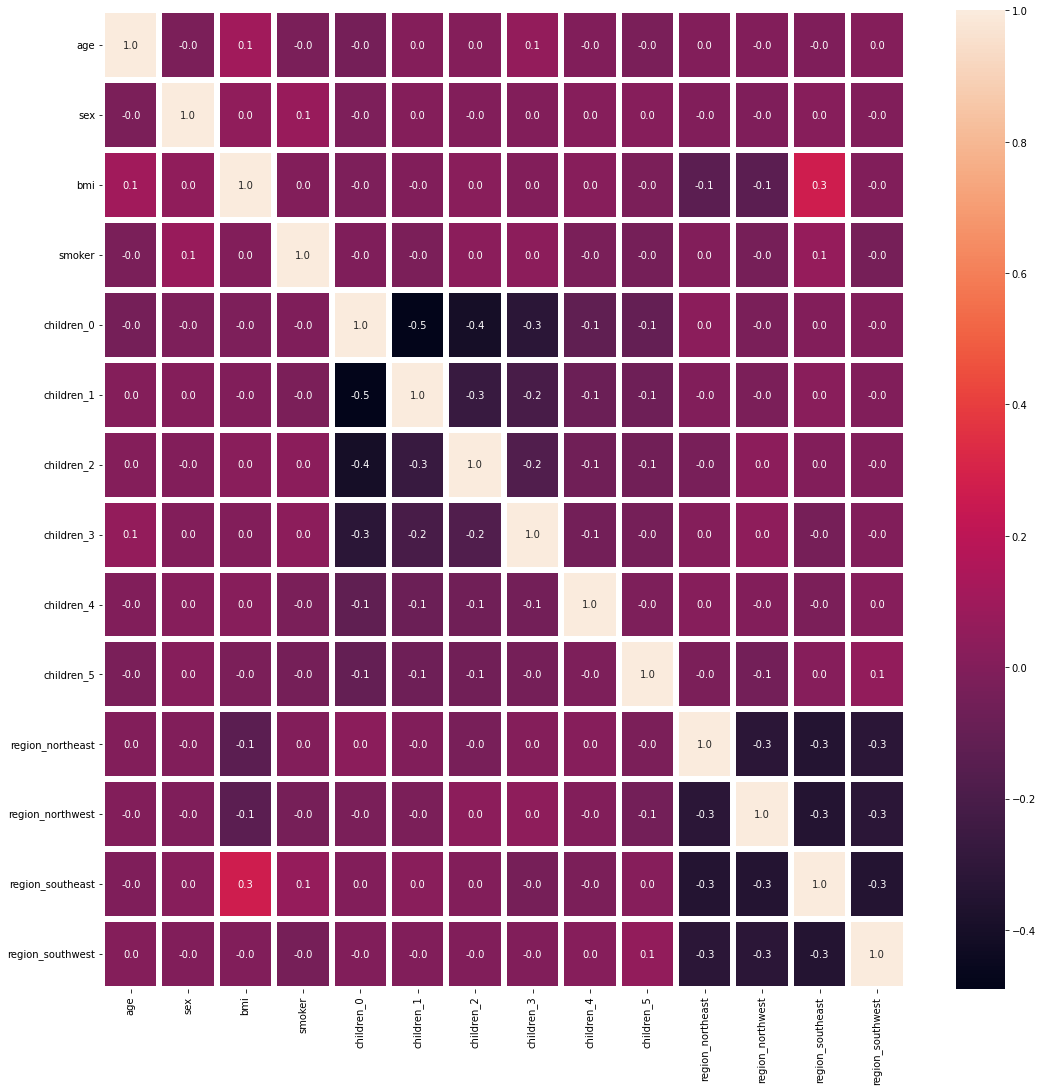

In [ ]:
f,ax = plt.subplots(figsize= (18,18))
sns.heatmap(features.corr(),annot=True,ax=ax,fmt='.1f',linewidths=5)

In [ ]:
data.head()

,age,sex,bmi,smoker,charges,children_0,children_1,children_2,children_3,children_4,children_5,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,1,16884.92400,1,0,0,0,0,0,0,0,0,1
1,18,1,33.770,0,1725.55230,0,1,0,0,0,0,0,0,1,0
2,28,1,33.000,0,4449.46200,0,0,0,1,0,0,0,0,1,0
3,33,1,22.705,0,21984.47061,1,0,0,0,0,0,0,1,0,0
4,32,1,28.880,0,3866.85520,1,0,0,0,0,0,0,1,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1329 entries, 0 to 1337
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1329 non-null   int64  
 1   sex               1329 non-null   int64  
 2   bmi               1329 non-null   float64
 3   smoker            1329 non-null   int64  
 4   charges           1329 non-null   float64
 5   children_0        1329 non-null   uint8  
 6   children_1        1329 non-null   uint8  
 7   children_2        1329 non-null   uint8  
 8   children_3        1329 non-null   uint8  
 9   children_4        1329 non-null   uint8  
 10  children_5        1329 non-null   uint8  
 11  region_northeast  1329 non-null   uint8  
 12  region_northwest  1329 non-null   uint8  
 13  region_southeast  1329 non-null   uint8  
 14  region_southwest  1329 non-null   uint8  
dtypes: float64(2), int64(3), uint8(10)
memory usage: 75.3 KB


In [ ]:
data.corr()['charges']

age                 0.302022
sex                 0.063394
bmi                 0.193196
smoker              0.785912
charges             1.000000
children_0         -0.066222
children_1         -0.024627
children_2          0.068330
children_3          0.065401
children_4          0.007370
children_5         -0.043247
region_northeast    0.009750
region_northwest   -0.037704
region_southeast    0.071597
region_southwest   -0.045906
Name: charges, dtype: float64

In [ ]:
mi_scores = mutual_info_regression(features, label )
mi_scores = pd.Series(mi_scores,  index=features.columns)
mi_scores = mi_scores.sort_values(ascending=False)
mi_scores

age                 1.500378
smoker              0.369171
sex                 0.176660
children_0          0.144223
bmi                 0.073946
region_northwest    0.057682
region_northeast    0.054498
children_2          0.048770
children_1          0.039347
children_3          0.035926
region_southeast    0.035070
children_5          0.008578
children_4          0.006162
region_southwest    0.002621
dtype: float64

In [ ]:
#features =features.drop(['region'],axis=1)

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(features,label,test_size=0.05)

In [ ]:
X_train.head()

,age,sex,bmi,smoker,children_0,children_1,children_2,children_3,children_4,children_5,region_northeast,region_northwest,region_southeast,region_southwest
920,62,0,25.000,0,1,0,0,0,0,0,0,0,0,1
182,22,1,19.950,0,0,0,0,1,0,0,1,0,0,0
81,45,0,38.285,0,1,0,0,0,0,0,1,0,0,0
877,33,1,33.440,0,0,0,0,0,0,1,0,0,1,0
193,56,0,26.600,0,0,1,0,0,0,0,0,1,0,0


In [ ]:
Y_train

920     13451.12200
182      4005.42250
81       7935.29115
877      6653.78860
193     12044.34200
           ...     
732      4234.92700
1080    11884.04858
279      9855.13140
685     11244.37690
1147     2261.56880
Name: charges, Length: 1271, dtype: float64

In [ ]:
linear_reg = LinearRegression()
lasso = Lasso(alpha=0.5)
svm_regression = SVR()
decision = DecisionTreeRegressor()
forest = RandomForestRegressor()
gbr = GradientBoostingRegressor()
abr= AdaBoostRegressor()
br=BaggingRegressor()

In [ ]:
linear_reg.fit(X_train,Y_train)
lasso.fit(X_train,Y_train)
svm_regression.fit(X_train,Y_train)
decision.fit(X_train,Y_train)
forest.fit(X_train,Y_train)
gbr.fit(X_train,Y_train)
abr.fit(X_train,Y_train)
br.fit(X_train,Y_train)

BaggingRegressor()

In [ ]:
linear_reg_predict = linear_reg.predict(X_test)
lasso_predict = lasso.predict(X_test)
svm_predict = svm_regression.predict(X_test)
dicision_predict = decision.predict(X_test)
forest_predict = forest.predict(X_test)
gbr_predict = gbr.predict(X_test)
abr_predict = abr.predict(X_test)
br_predict = br.predict(X_test)

In [ ]:
linear_reg_error =mean_absolute_error(linear_reg_predict,Y_test)
lasso_error =mean_absolute_error(lasso_predict,Y_test)
svm_error = mean_absolute_error(svm_predict,Y_test)
decision_error =mean_absolute_error(dicision_predict,Y_test)
forest_error = mean_absolute_error(forest_predict,Y_test)
gbr_error = mean_absolute_error(gbr_predict,Y_test)
abr_error = mean_absolute_error(abr_predict,Y_test)
br_error = mean_absolute_error(br_predict,Y_test)

In [ ]:
error_pd = pd.Series([linear_reg_error,lasso_error,svm_error,decision_error,forest_error,gbr_error,abr_error,br_error],
                     ['Linear Regression','Lasso', 'SVM','Decision Tree','Random Forest','gbr','abr','br'])
error_pd =  error_pd.sort_values()

In [ ]:
error_pd

br                   1770.922192
Random Forest        1982.182804
gbr                  2089.119090
Decision Tree        2316.281756
Lasso                3401.702451
Linear Regression    3402.866588
abr                  3527.708383
SVM                  6741.416081
dtype: float64

In [ ]:
best_model = GradientBoostingRegressor()

In [ ]:
results = cross_validate(estimator=best_model,
                               X=features,
                               y=label,
                               cv=10,
                               scoring='neg_mean_absolute_error',
                               return_train_score=True)

In [ ]:
results

{'fit_time': array([0.13077641, 0.12440491, 0.12242985, 0.12775373, 0.11422539,
        0.12549376, 0.1221509 , 0.11220312, 0.12492728, 0.11375213]),
 'score_time': array([0.00260425, 0.00273323, 0.00241518, 0.00361514, 0.00252986,
        0.0024364 , 0.00244856, 0.00244784, 0.00243974, 0.00243855]),
 'test_score': array([-2478.78776888, -2362.82054132, -2718.99480378, -2956.63008744,
        -2605.03931426, -1908.3266687 , -2220.49704364, -2721.98160562,
        -2514.64623465, -2470.65230734]),
 'train_score': array([-2080.82242526, -2075.97675208, -2006.3338538 , -1956.85890221,
        -2058.92241961, -2161.54360318, -2099.89938764, -1991.98426017,
        -2053.68001618, -2054.23224027])}